In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.size

5016

In [6]:
df.shape

(418, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualisation

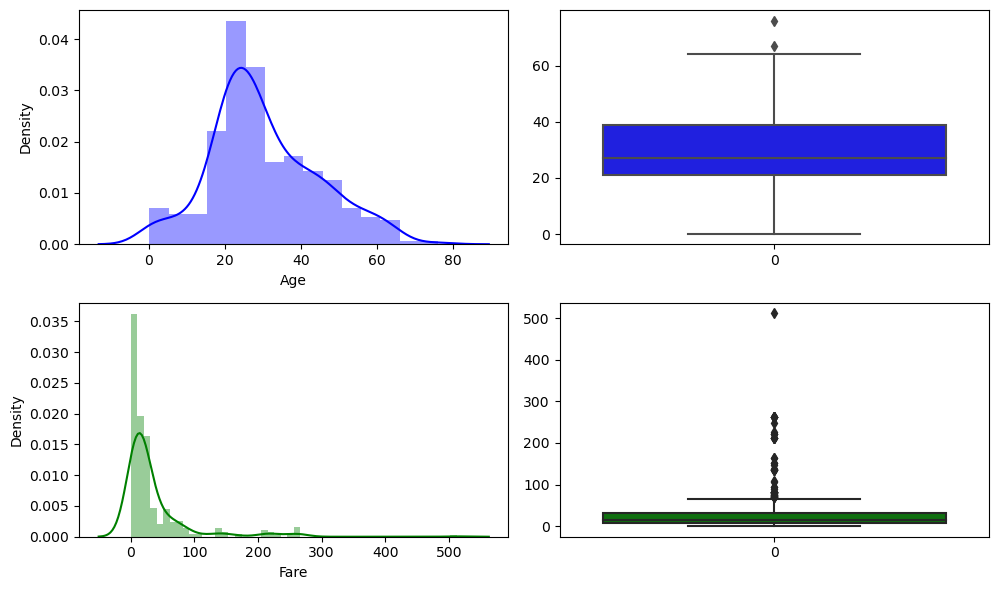

In [14]:
plt.figure(figsize = (10,6))

plt.subplot(2,2,1)
sns.distplot(df['Age'], color = 'blue')

plt.subplot(2,2,2)
sns.boxplot(df['Age'], color = 'blue')

plt.subplot(2,2,3)
sns.distplot(df['Fare'], color = 'green')

plt.subplot(2,2,4)
sns.boxplot(df['Fare'], color = 'green')

plt.tight_layout()
plt.show()


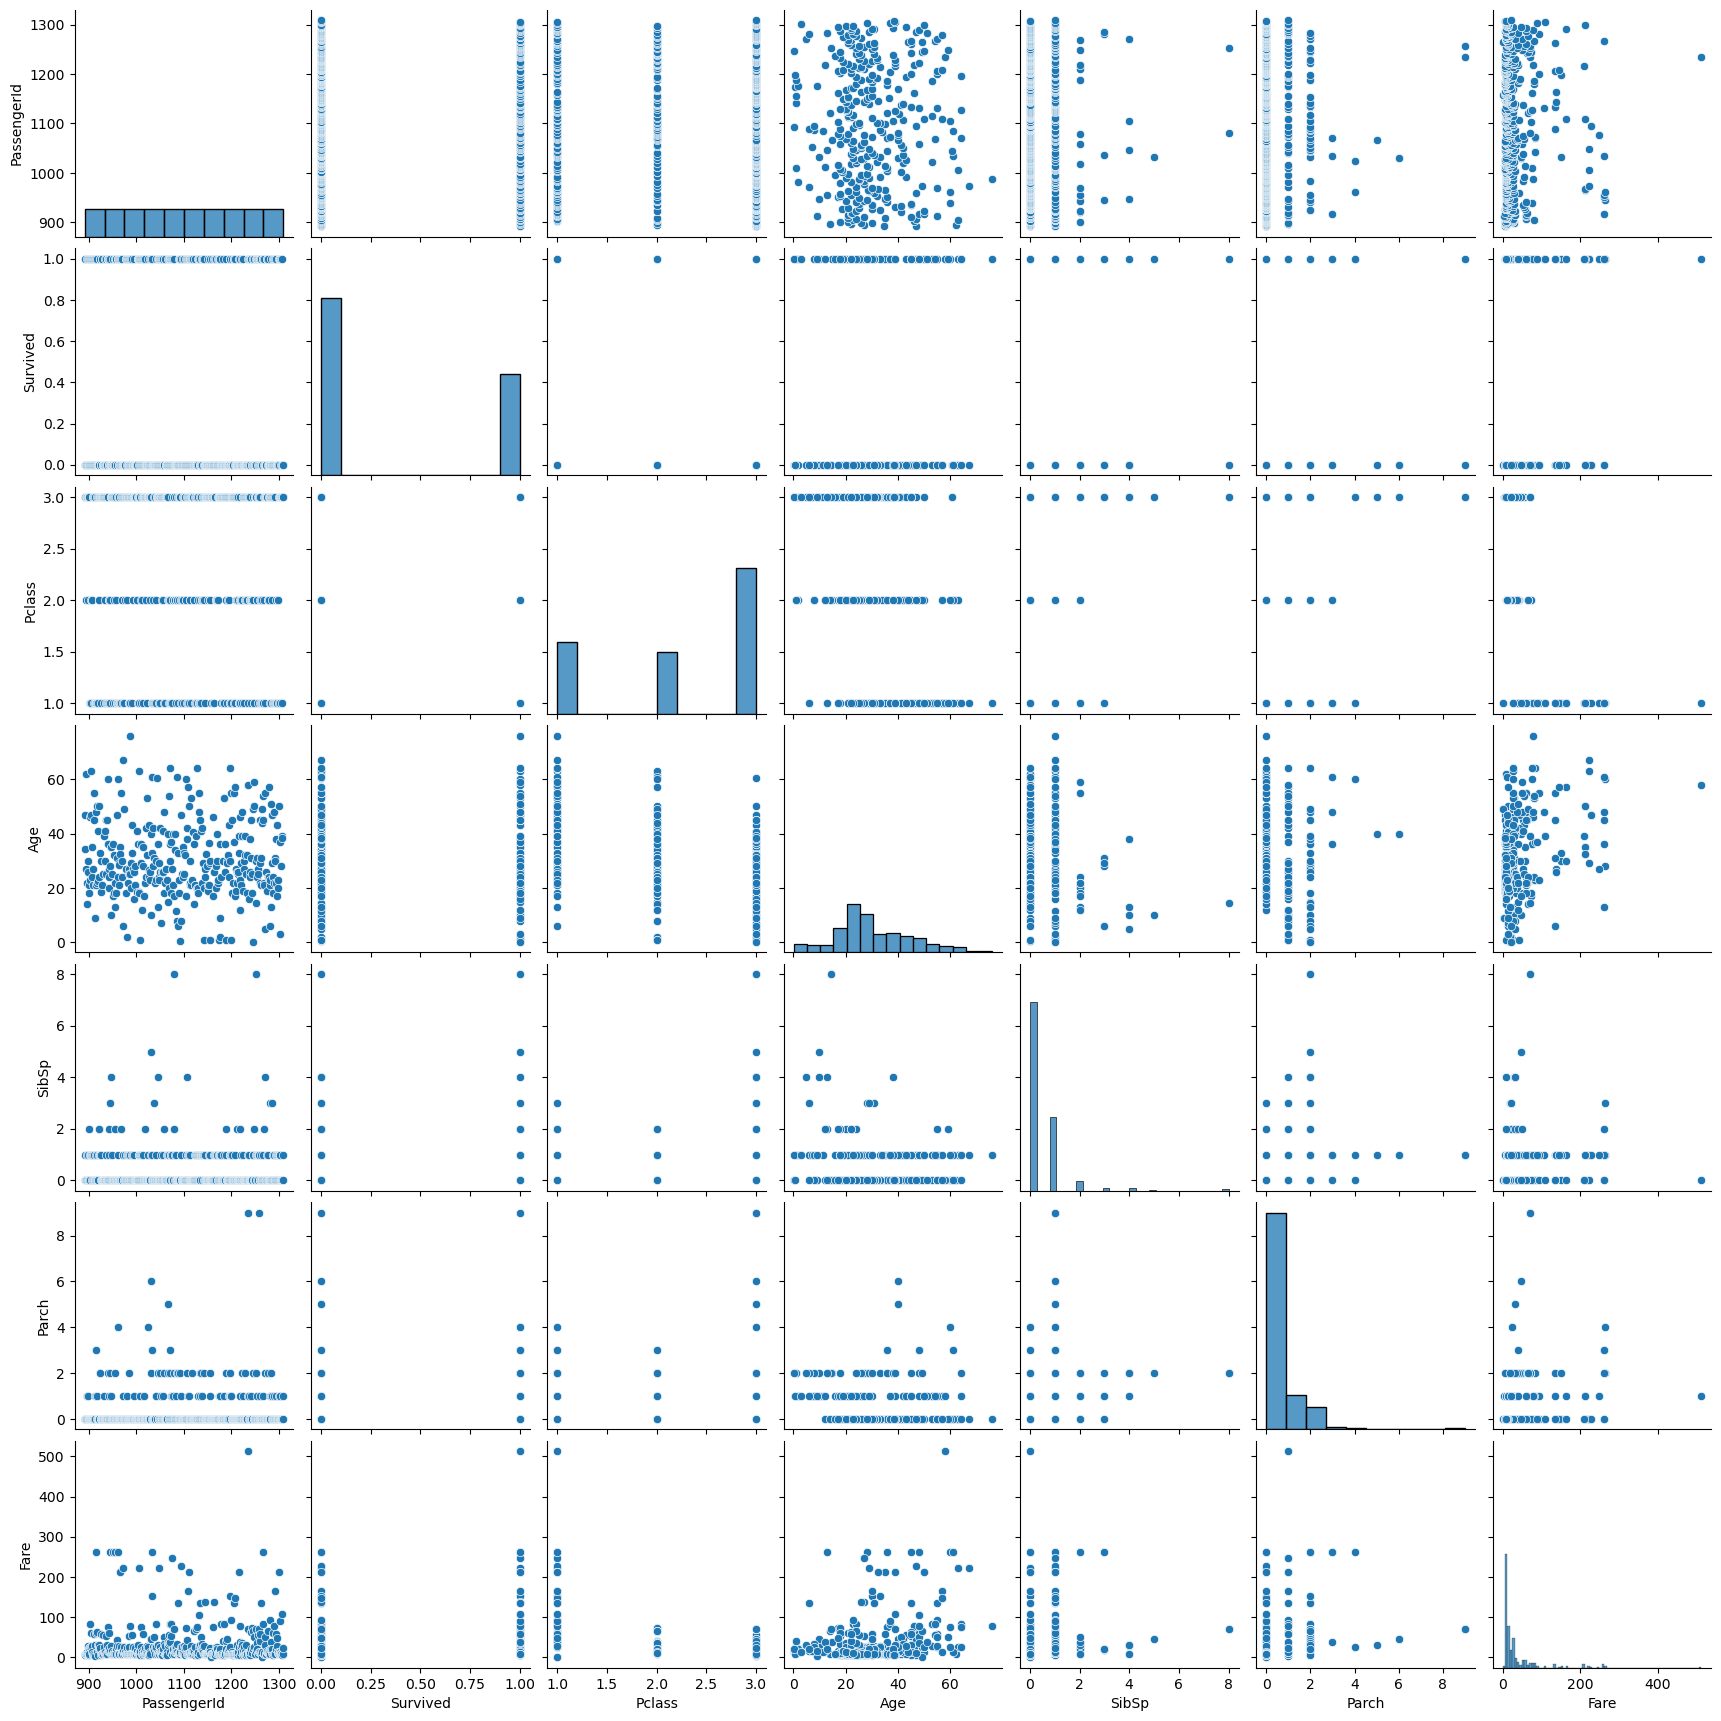

In [8]:
sns.pairplot(df)

Text(0.5, 1.0, 'Sex')

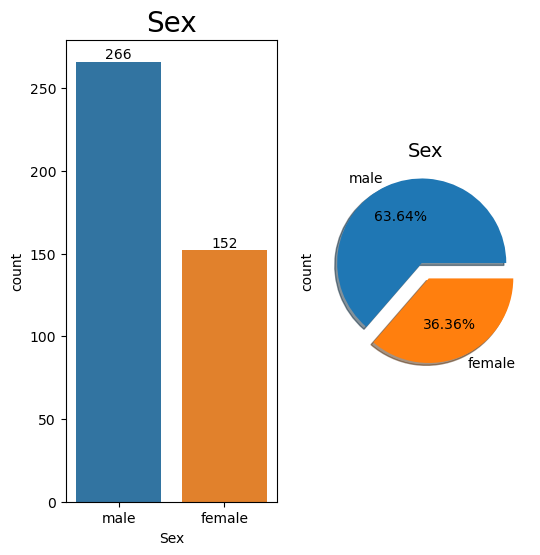

In [17]:
plt.figure(figsize=(6,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex',data = df)
ax.bar_label(ax.containers[0])
plt.title('Sex', fontsize = 20)
ax = plt.subplot(1,2,2)
ax = df['Sex'].value_counts().plot.pie(explode = [0.1,0.1], autopct = '%1.2f%%', shadow = True)
ax.set_title(label = 'Sex', fontsize = 14)

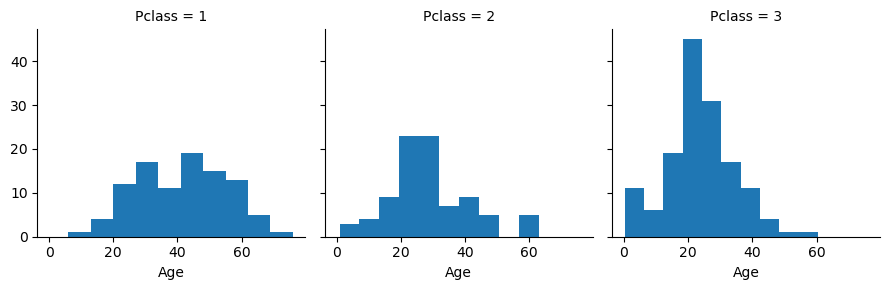

In [19]:
a = sns.FacetGrid(df, col='Pclass')
a= a.map(plt.hist, 'Age')

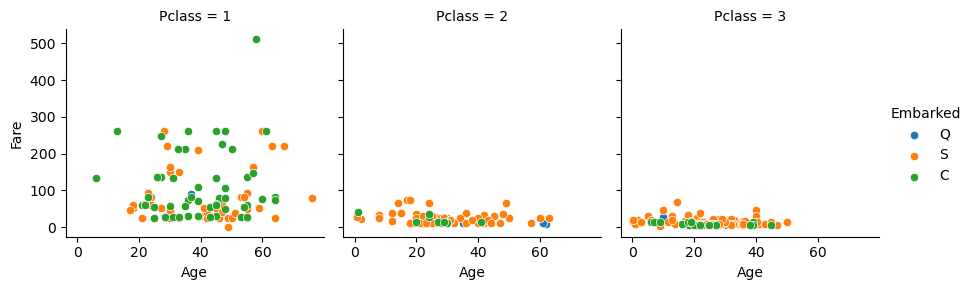

In [21]:
a = sns.FacetGrid(df, col = 'Pclass', hue = 'Embarked')
a.map_dataframe(sns.scatterplot, x = 'Age', y = 'Fare')
a.add_legend()
plt.show()

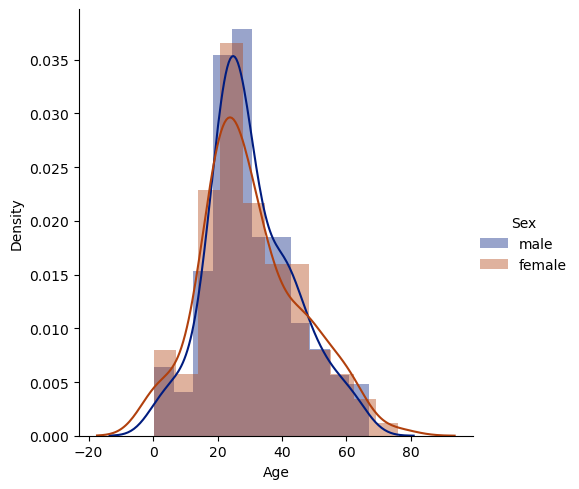

In [31]:
sns.FacetGrid(df, hue = 'Sex', height = 5, palette= 'dark').map(sns.distplot, 'Age').add_legend()
plt.show()

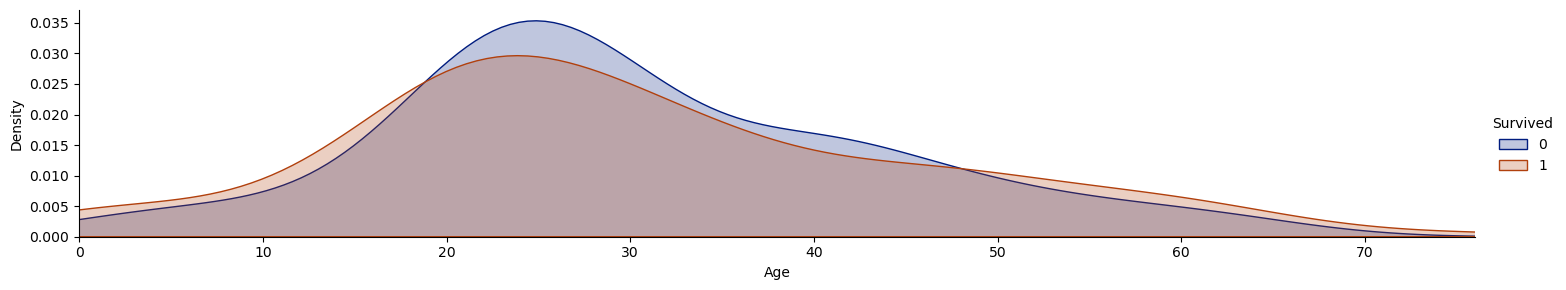

In [35]:
fig = sns.FacetGrid(df, hue = 'Survived', palette= 'dark', aspect =5)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

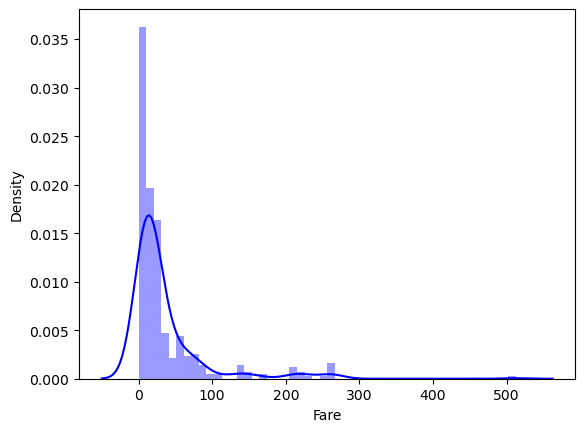

In [37]:
sns.distplot(df['Fare'], color = 'b')
plt.show()

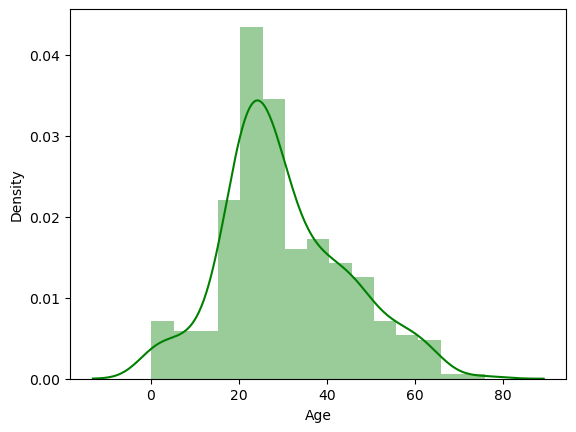

In [39]:
sns.distplot(df['Age'], color = 'green')
plt.show()

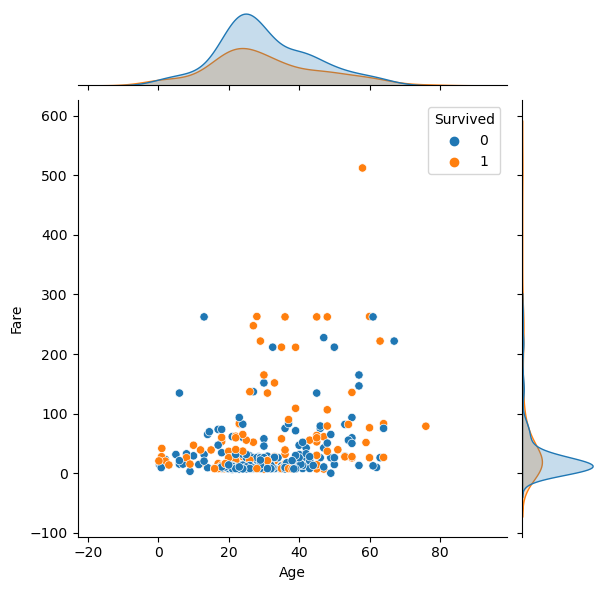

In [40]:
sns.jointplot(x='Age', y ='Fare', data = df, color = 'blue', hue = 'Survived')
plt.show()

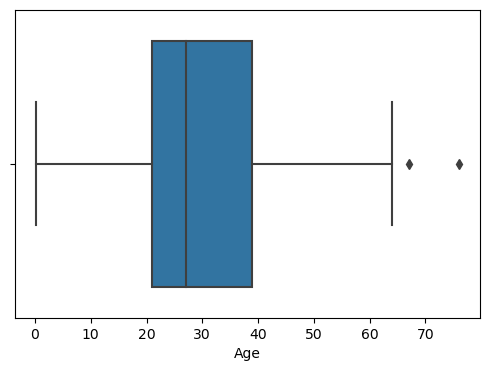

In [42]:
fig, ax = plt.subplots(figsize = (6,4))
sns.boxplot(x=df['Age'])
plt.show()

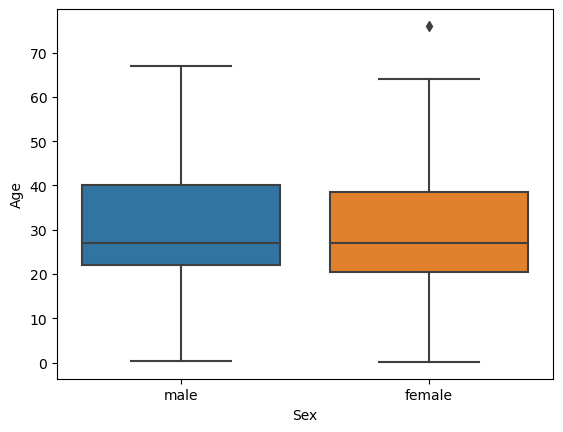

In [43]:
sns.boxplot(x='Sex', y ='Age', data = df)
plt.show()

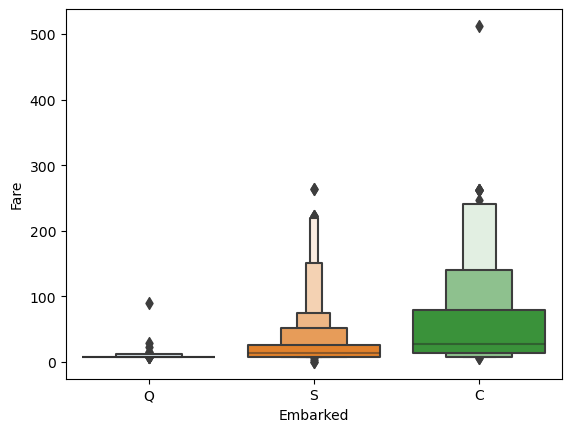

In [44]:
sns.boxenplot(y = 'Fare', x ='Embarked', data = df)
plt.show()

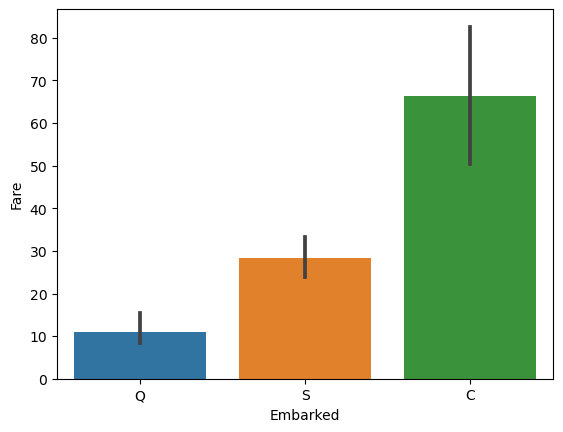

In [45]:
sns.barplot(y='Fare', x='Embarked', data = df)
plt.show()

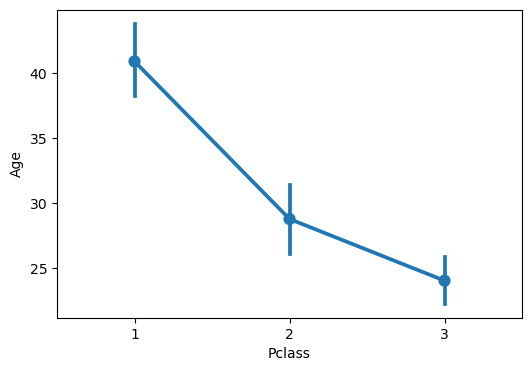

In [47]:
fig.ax = plt.subplots(figsize = (6,4))
sns.pointplot(x='Pclass', y = 'Age', data = df)
plt.show()

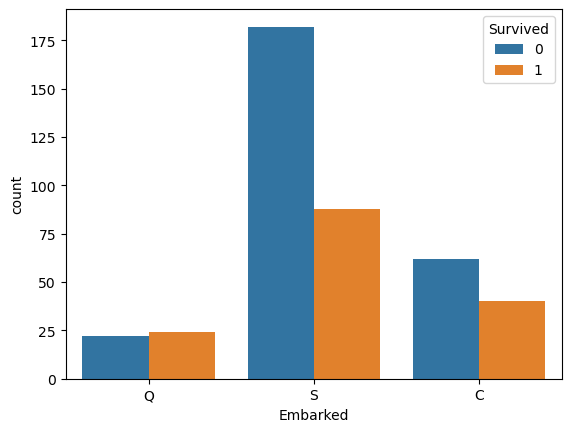

In [49]:
sns.countplot(data = df,x= 'Embarked',hue='Survived')
plt.show()

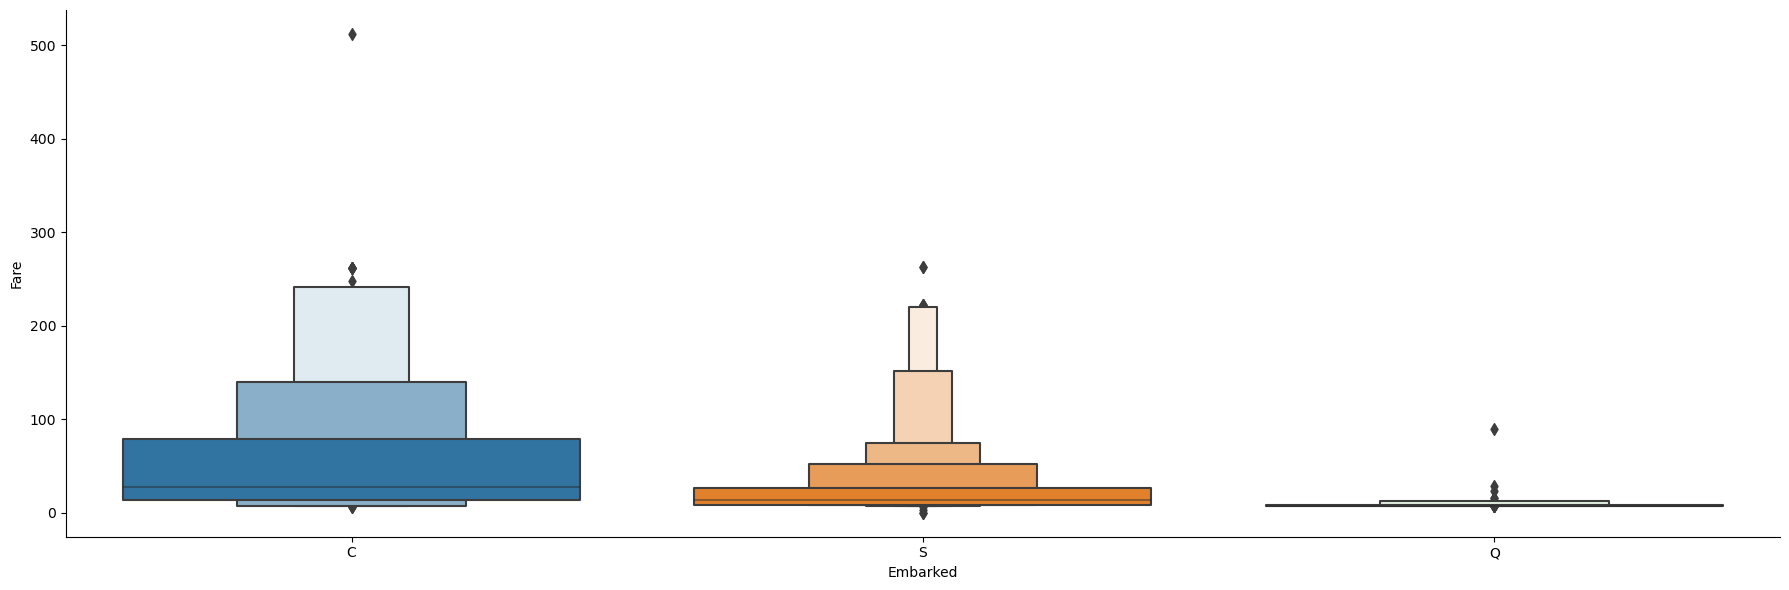

In [50]:
sns.catplot(y = "Fare", x = "Embarked", data = df.sort_values("Fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

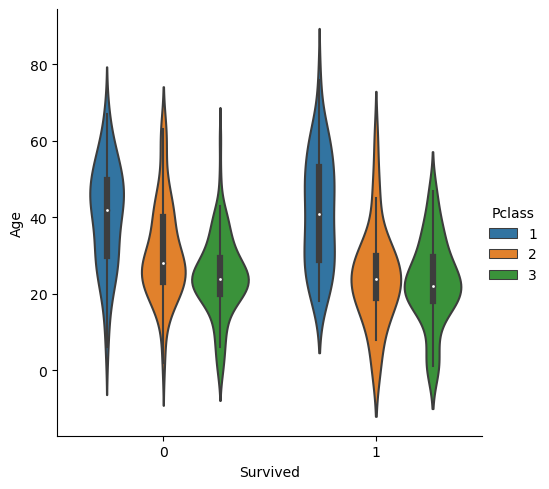

In [51]:
sns.catplot(data=df,x='Survived',y='Age',hue='Pclass',kind="violin")
plt.show()


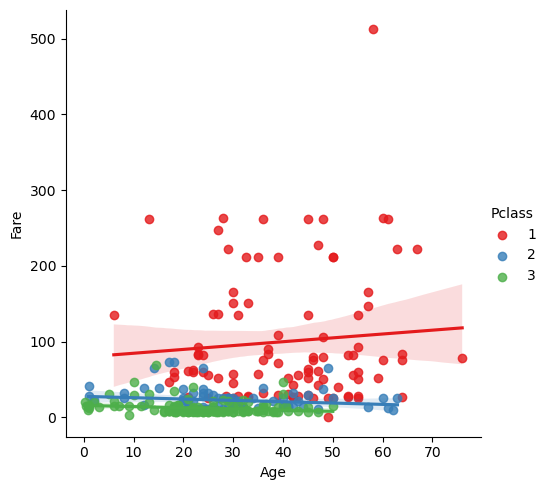

In [52]:
g= sns.lmplot(x="Age", y="Fare", hue="Pclass", data=df, palette="Set1")

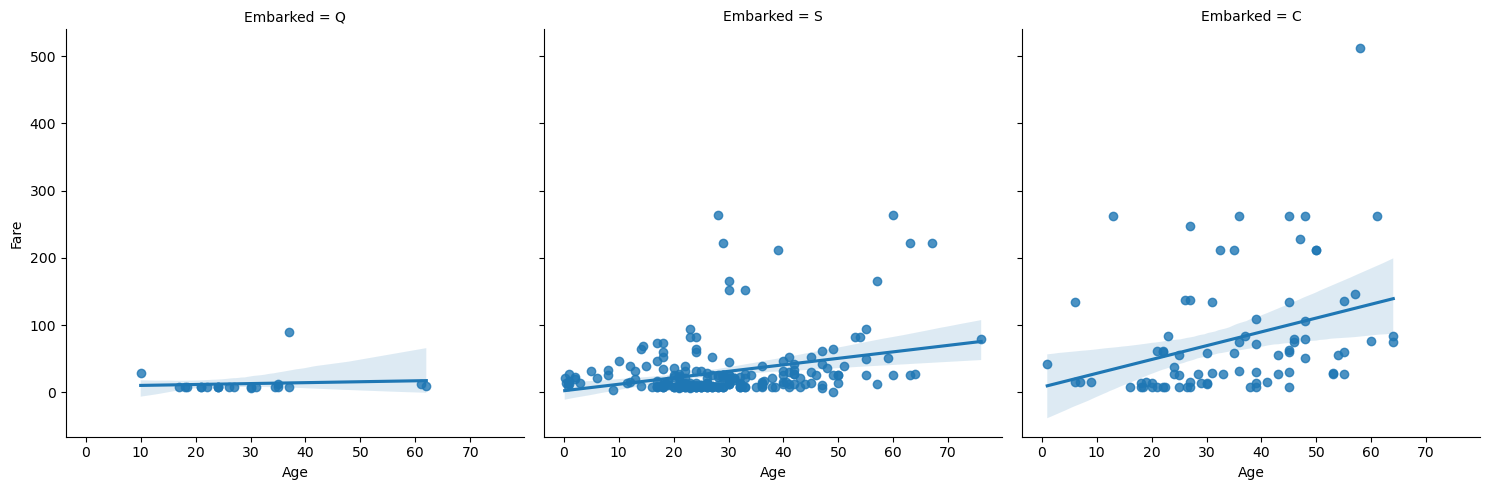

In [53]:
g= sns.lmplot(x="Age", y="Fare", col="Embarked", data=df)


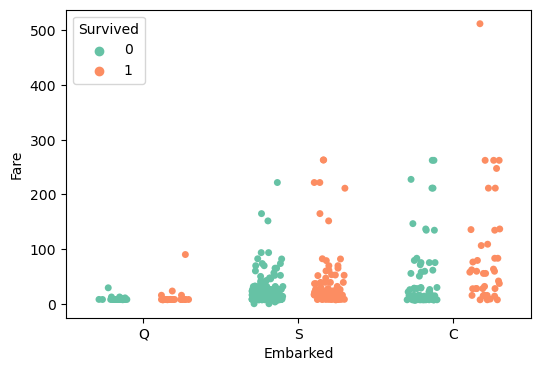

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.stripplot(x="Embarked", y="Fare", hue="Survived",data=df, jitter=0.2, palette="Set2", dodge=True)
plt.show()

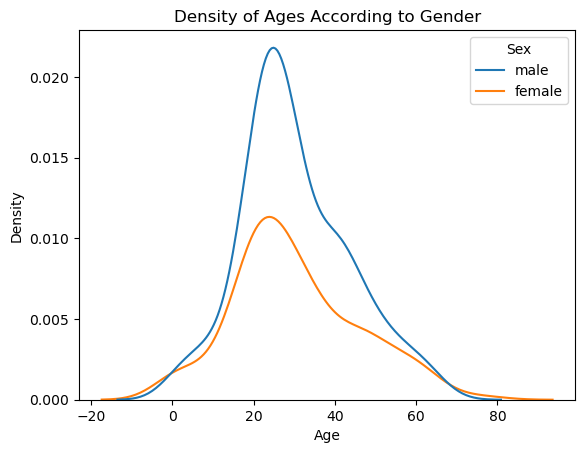

In [57]:
sns.kdeplot(data = df , x ="Age" , hue ="Sex" )
plt.title("Density of Ages According to Gender")
plt.show()

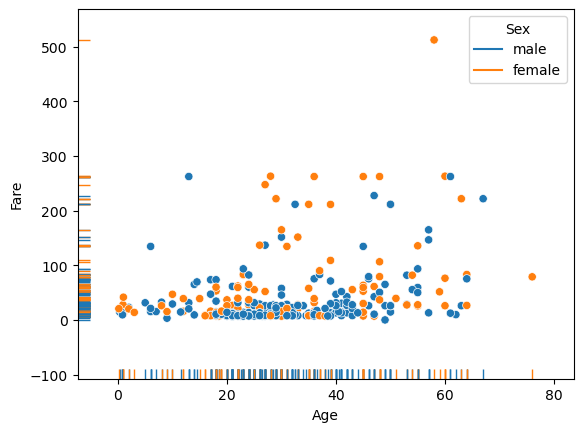

In [59]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex")
sns.rugplot(data=df, x="Age", y="Fare", hue="Sex")
plt.show()

# Data Preprocessing¶


In [60]:
df.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [61]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [62]:
missing(df)

,Missing_Number,Missing_Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


# Different ways to Visualize missing Value

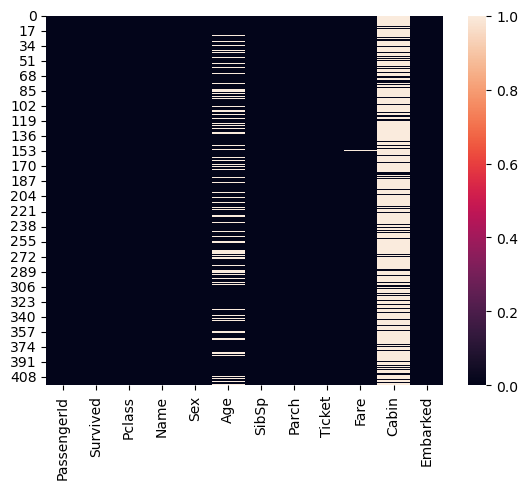

In [63]:
sns.heatmap(df.isnull());

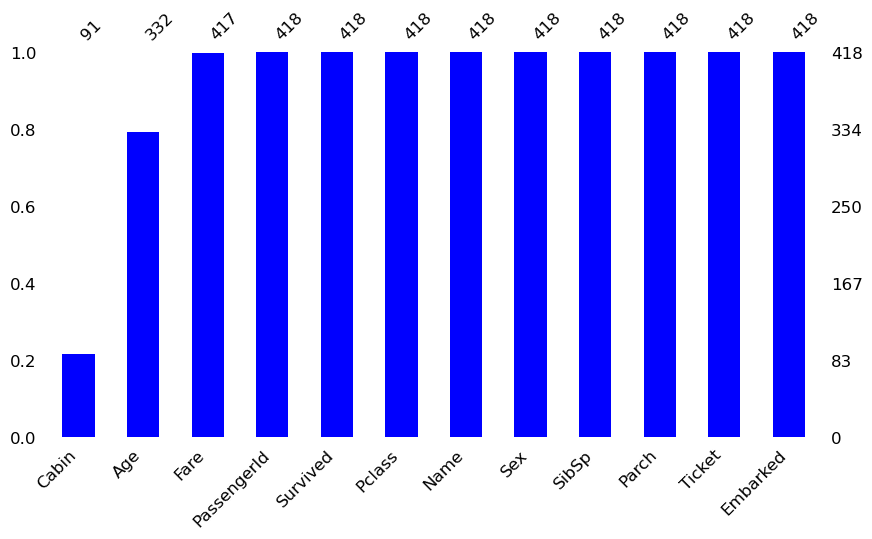

In [64]:
import missingno
missingno.bar(df, color="blue", sort="ascending", figsize=(10,5), fontsize=12);

# Removing the null value from the titanic data set

In [65]:
# Filled the missing value in Age column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [66]:
# Filled the missing value in Fare columns with mean Value
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [67]:
# Filled the missing value in Embarked columns with backfill method
df['Embarked'] = df['Embarked'].fillna(method='backfill')

In [68]:
# Drop the columns 
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [69]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


In [70]:
X = df_encoded.drop(['Survived'],axis=1)
y = df['Survived']

# Splitting train and test set

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

In [72]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,3,2,64.00,0,2,83.1583,3
201,1,1,0.33,0,2,14.4000,2
336,2,1,32.00,0,0,13.0000,2
187,1,1,17.00,2,0,8.0500,2
214,1,2,38.00,4,2,7.7750,2


In [73]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

# Model Implementation

## Logistic Regression


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
LR = LogisticRegression()


In [96]:
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

In [97]:
LR.score(X_train, y_train)

1.0

In [98]:
LR.score(X_test, y_test)

1.0

In [99]:
accuracy_score(y_test,y_pred)

1.0

In [100]:
confusion_matrix(y_test,y_pred)

array([[76,  0],
       [ 0, 50]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [102]:
from sklearn import metrics

In [103]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


## Random Forest Classifier (criterion = 'entropy')

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
Rf_entropy = RandomForestClassifier(criterion='entropy',n_estimators=100)
Rf_entropy.fit(X_train, y_train)
y_pred1 = Rf_entropy.predict(X_test)

In [107]:
Rf_entropy.score(X_train, y_train)

1.0

In [108]:
Rf_entropy.score(X_test, y_test)

1.0

In [109]:
accuracy_score(y_test,y_pred1)

1.0

In [94]:
confusion_matrix(y_test,y_pred1)

array([[76,  0],
       [ 0, 50]], dtype=int64)

In [106]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Naive Bayes GaussianNB Classifier

In [110]:
from sklearn.naive_bayes import GaussianNB

In [112]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_pred2 = GNB.predict(X_test)

In [113]:
GNB.score(X_train, y_train)

1.0

In [114]:
GNB.score(X_test, y_test)

1.0

In [115]:
accuracy_score(y_test,y_pred2)

1.0

In [116]:
confusion_matrix(y_test,y_pred2)

array([[76,  0],
       [ 0, 50]], dtype=int64)

In [117]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

